In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Part 1: Data Cleaning & Preparation
    1. Load the CSV file using Pandas.
    2. Check for missing values and handle them appropriately.
    3. Convert the Order Date column to datetime format.
    4. Add a new column Month extracted from the date.
    5. Calculate Total Sales if not already in the dataset.


#### Load CSV file using pandas

In [2]:
data = pd.read_csv("Dataset/sales_data_shoptrendz.csv")

In [3]:
data

,Order ID,Product Name,Category,City,Order Date,Units Sold,Unit Price,Total Sales
0,1,Laptop,Electronics,Karachi,21-05-2023,7,39928.88,279502.16
1,2,Laptop,Electronics,NaN,14-02-2023,8,30133.59,241068.72
2,3,Laptop,Electronics,NaN,30-04-2023,7,22568.72,157981.04
3,4,Bluetooth Speaker,Electronics,Peshawar,03-08-2023,7,3375.14,23625.98
4,5,Wireless Mouse,Electronics,Lahore,24-12-2023,8,17018.58,136148.64
...,...,...,...,...,...,...,...,...
95,96,Backpack,Fashion,Islamabad,17-02-2023,2,41966.65,83933.30
96,97,Headphones,Electronics,NaN,12-04-2023,9,6116.94,55052.46
97,98,Jeans,Fashion,Peshawar,07-02-2023,7,27301.67,191111.69
98,99,Backpack,Fashion,Lahore,23-12-2023,3,11813.23,35439.69


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      100 non-null    int64  
 1   Product Name  100 non-null    object 
 2   Category      100 non-null    object 
 3   City          96 non-null     object 
 4   Order Date    100 non-null    object 
 5   Units Sold    100 non-null    int64  
 6   Unit Price    96 non-null     float64
 7   Total Sales   96 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


#### Check for missing values

In [5]:
nul = data.isnull().sum()
nul

Order ID        0
Product Name    0
Category        0
City            4
Order Date      0
Units Sold      0
Unit Price      4
Total Sales     4
dtype: int64

#### Handle Missing values

In [6]:
data['Total Sales'].fillna(data['Total Sales'].mean(),inplace=True)

C:\Users\ziaah\AppData\Local\Temp\ipykernel_16640\1265519953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Total Sales'].fillna(data['Total Sales'].mean(),inplace=True)


In [7]:
data['Unit Price'].fillna(data['Unit Price'].mean(),inplace=True)

C:\Users\ziaah\AppData\Local\Temp\ipykernel_16640\1838205923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Unit Price'].fillna(data['Unit Price'].mean(),inplace=True)


In [8]:
data['City'].fillna(data['City'].mode()[0],inplace=True)


C:\Users\ziaah\AppData\Local\Temp\ipykernel_16640\1503894781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['City'].fillna(data['City'].mode()[0],inplace=True)


In [9]:
data.isnull().sum()

Order ID        0
Product Name    0
Category        0
City            0
Order Date      0
Units Sold      0
Unit Price      0
Total Sales     0
dtype: int64

#### Changing date column datatype to datetime

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

C:\Users\ziaah\AppData\Local\Temp\ipykernel_16640\3021409918.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


#### Extracting Month from Date column


In [11]:
data['Month'] = data['Order Date'].dt.month_name()

# Part 2: Exploratory Data Analysis (EDA)
    1. Find:
    Total number of orders
    Total revenue
    Average sales per order
    Top 5 best-selling products
    2. Calculate:
    Monthly sales trends
    City-wise sales distribution
    Category-wise revenue comparison


#### Calculating total number of orders

In [12]:
total_orders = data["Order ID"].nunique()
total_orders

100

In [13]:
data['Order ID'].value_counts()

Order ID
1      1
2      1
3      1
4      1
5      1
      ..
96     1
97     1
98     1
99     1
100    1
Name: count, Length: 100, dtype: int64

#### Total revenue

In [14]:
total_revenue = data['Total Sales'].sum()
print("The total revenue is: ",total_revenue)

The total revenue is:  13664658.21875


#### Average sales per order

In [15]:
avg_sales_per_order = total_revenue / total_orders
print("The average sales per order is: ",avg_sales_per_order)

The average sales per order is:  136646.5821875


#### Top 5 selling products

In [16]:
top_5_product = data.groupby('Product Name').agg({'Units Sold':'sum'}).sort_values(['Units Sold'],ascending=False).head(5)
top_5_product

,Units Sold
Product Name,
Laptop,82
Smartwatch,75
Sneakers,72
Wireless Mouse,65
Headphones,55


#### Monthly sales trend

In [17]:
print("Monthly sales trends")
month_data = data.groupby('Month').agg({"Total Sales":"sum"})
month_data

Monthly sales trends


,Total Sales
Month,
April,7.832240e+05
August,1.261043e+06
December,1.419443e+06
February,2.438471e+06
January,8.030770e+05
July,1.107214e+06
June,5.695897e+05
March,6.684160e+05
May,1.686770e+06


#### City-wise sales distribution

In [18]:
print("City-wise sales distribution")
city_sales = data.groupby('City').agg({"Total Sales":"sum"}).sort_values(['Total Sales'],ascending=False)
city_sales

City-wise sales distribution


,Total Sales
City,
Lahore,3.487075e+06
Karachi,3.384682e+06
Faisalabad,2.802591e+06
Peshawar,2.081423e+06
Islamabad,1.908888e+06


#### Category-wise revenue comparison

In [19]:
print("Category-wise revenue comparison")
group_category = data.groupby('Category').agg({"Total Sales":"sum"})
group_category

Category-wise revenue comparison


,Total Sales
Category,
Electronics,8.965909e+06
Fashion,4.698749e+06


# Part 3: Data Visualization using Matplotlib
    

In [34]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
reset = month_data.reset_index()
reset['Month']= month_order
# reset = reset.sort_values("Month",inplace=True)
reset

,Month,Total Sales
0,January,7.832240e+05
1,February,1.261043e+06
2,March,1.419443e+06
3,April,2.438471e+06
4,May,8.030770e+05
5,June,1.107214e+06
6,July,5.695897e+05
7,August,6.684160e+05
8,September,1.686770e+06
9,October,1.173879e+06


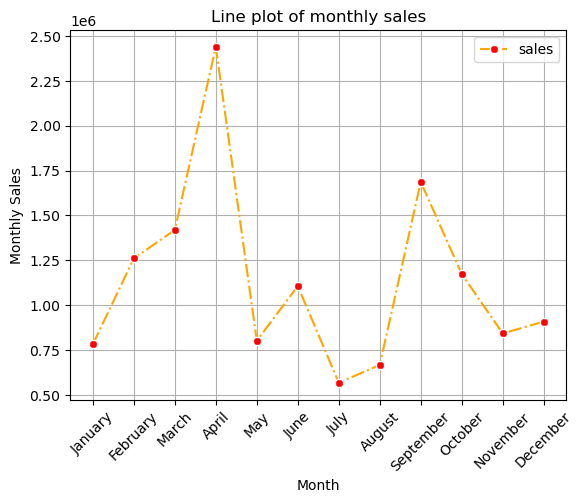

In [35]:
plt.plot(reset['Month'],reset['Total Sales'],marker="8",color='orange',linestyle="-.",label="sales", markerfacecolor='red',markeredgecolor='white')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Monthly Sales")
plt.title("Line plot of monthly sales")
plt.grid()
plt.legend()
plt.show()

In [22]:
top_5_products = top_5_product.reset_index()
product_name = top_5_products['Product Name']
units_sold = top_5_products['Units Sold']

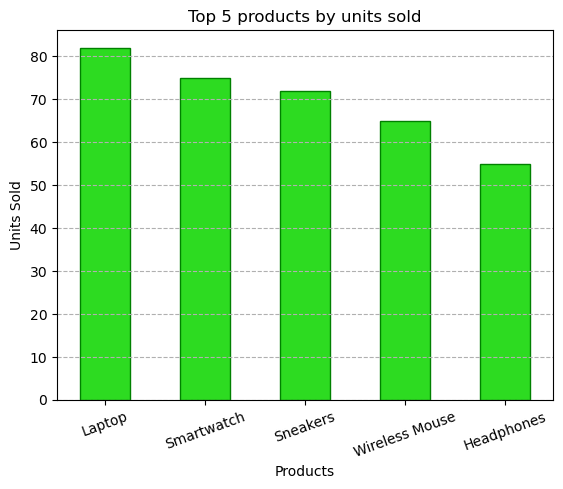

In [23]:
plt.bar(product_name,units_sold, color ='#2ddb21',width=0.5,edgecolor='green')
plt.xticks(rotation=20)
plt.xlabel("Products")
plt.ylabel("Units Sold")
plt.title("Top 5 products by units sold")
plt.grid(axis='y',linestyle="--")
plt.show()

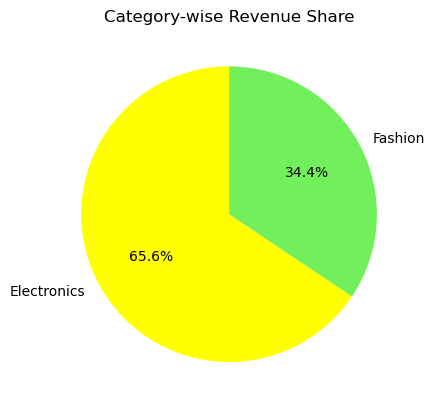

In [24]:
category_revenue = group_category.reset_index()
category_revenue['Category']
revenue = category_revenue['Total Sales']
total = data['Total Sales'].sum()
percentage = (revenue/total)*100


plt.pie(percentage,labels=category_revenue['Category'],colors=['yellow','#71f05b'],autopct="%1.1f%%",startangle=90)
plt.title("Category-wise Revenue Share")
plt.show()

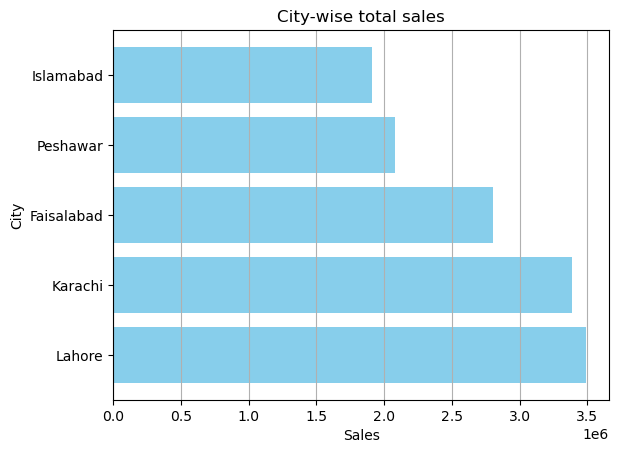

In [25]:
city_data = city_sales.reset_index()

plt.barh(city_data['City'],city_data['Total Sales'],color = 'skyblue')
plt.title("City-wise total sales")
plt.ylabel("City")
plt.xlabel("Sales")
plt.grid(axis="x")
plt.show()